In [2]:
import os
# os.environ["KERAS_BACKEND"] = "plaidml.keras.backend"
import tensorflow.keras as keras
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator

import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
%matplotlib inline

from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, BatchNormalization

In [3]:
train_data_dir = '/content/acapp-train-classification/acapp_data/training_images/'

In [3]:
!rm -rf acapp-train-classification
!git clone https://github.com/dmmajithia/acapp-train-classification.git

Cloning into 'acapp-train-classification'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 64735 (delta 0), reused 0 (delta 0), pack-reused 64732
Receiving objects: 100% (64735/64735), 1.19 GiB | 37.00 MiB/s, done.
Resolving deltas: 100% (25/25), done.
Checking out files: 100% (64006/64006), done.


In [7]:
!cd acapp-train-classification/ && git pull

Streaming output truncated to the last 5000 lines.
 create mode 100644 acapp_data/training_images/no_train/1603054113.jpg
 create mode 100644 acapp_data/training_images/no_train/1603054173.jpg
 create mode 100644 acapp_data/training_images/no_train/1603054233.jpg
 create mode 100644 acapp_data/training_images/no_train/1603054293.jpg
 create mode 100644 acapp_data/training_images/no_train/1603054353.jpg
 create mode 100644 acapp_data/training_images/no_train/1603054413.jpg
 create mode 100644 acapp_data/training_images/no_train/1603054473.jpg
 create mode 100644 acapp_data/training_images/no_train/1603054533.jpg
 create mode 100644 acapp_data/training_images/no_train/1603054593.jpg
 create mode 100644 acapp_data/training_images/no_train/1603054653.jpg
 create mode 100644 acapp_data/training_images/no_train/1603054713.jpg
 create mode 100644 acapp_data/training_images/no_train/1603054773.jpg
 create mode 100644 acapp_data/training_images/no_train/1603054833.jpg
 create mode 100644 acapp_

In [4]:
!ls /content/acapp-train-classification/acapp_data/training_images/* | wc -l

20041


In [ ]:
!mv /content/acapp-train-classification/acapp_data/training_images/mul_trains/* /content/acapp-train-classification/acapp_data/training_images/one_train/

In [9]:
# !rm -rf /content/acapp-train-classification/acapp_data/training_images/mul_trains
!rm -rf /content/acapp-train-classification/acapp_data/training_images/night_no_train
!rm -rf /content/acapp-train-classification/acapp_data/training_images/night_train
# !rm -rf /content/acapp-train-classification/acapp_data/training_images/mul_trains

In [5]:
img_height, img_width = 300,300
batch_size = 200

train_datagen = ImageDataGenerator(rescale=1./255,
    validation_split=0.3) # set validation split

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    shuffle=True,
    # class_mode='categorical',
    # class_mode='binary',
    class_mode='sparse',
    subset='training') # set as training data

validation_generator = train_datagen.flow_from_directory(
    train_data_dir, # same directory as training data
    target_size=(img_height, img_width),
    batch_size=batch_size,
    shuffle=True,
    # class_mode='categorical',
    # class_mode='binary',
    class_mode='sparse',
    subset='validation') # set as validation data

# # Validation ImageDataGenerator with rescaling.
# valid_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.3)
# # Training ImagaDataGenerator with Augmentation transf.  
# train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.3,\
#                                    rotation_range=15, shear_range=10,\
#                                    zoom_range=0.25, fill_mode='nearest', \
#                                    height_shift_range=0.25, width_shift_range=0.25)

# # Create a flow from the directory for validation data - seed=42
# # Choose subset = 'validation'
# validation_generator = valid_datagen.flow_from_directory(train_data_dir,
#                                                          subset='validation',
#                                                          shuffle=True, 
#                                                          seed=42, 
#                                                          target_size=(img_height, img_width),
#                                                          batch_size=batch_size,
#                                                          class_mode='binary')
# # Create a flow from the directory using same seed and 'training' subset.
# train_generator = train_datagen.flow_from_directory(train_data_dir, 
#                                                     subset='training',
#                                                     shuffle=True,
#                                                     seed=42,
#                                                     target_size=(img_height, img_width),
#                                                     batch_size=batch_size,
#                                                     class_mode='binary')

Found 14026 images belonging to 3 classes.
Found 6010 images belonging to 3 classes.


In [ ]:
# acc = 95-99, batch_size = 50, epochs = 20
input_shape = (300, 300, 3)
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), input_shape=input_shape,activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, kernel_size=(3,3), input_shape=input_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(256, activation='relu'))
model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.1))
# model.add(Dense(64, activation='relu'))
# model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.2))
model.add(Dense(3,activation='softmax'))

In [6]:
def get_model_daytime2class():
  # acc = 95-99, batch_size = 50, epochs = 20
  input_shape = (300, 300, 3)
  # Creating a Sequential Model and adding the layers
  model = Sequential()
  model.add(Conv2D(32, kernel_size=(3,3), input_shape=input_shape,activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  # model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
  # model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Conv2D(64, kernel_size=(3,3),activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Conv2D(64, kernel_size=(3,3),activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
  model.add(Dense(64, activation='relu'))
  # model.add(Dropout(0.1))
  # model.add(Dense(64, activation='relu'))
  # model.add(Dense(128, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(3,activation='softmax'))
  return model

In [ ]:
# input_shape = (300, 300, 3)
# # Creating a Sequential Model and adding the layers
# model = Sequential()
# model.add(Conv2D(32, kernel_size=(3,3), input_shape=input_shape))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Conv2D(32, kernel_size=(3,3)))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# # model.add(Conv2D(64, kernel_size=(3,3)))
# # model.add(MaxPooling2D(pool_size=(2, 2)))
# # model.add(Conv2D(128, kernel_size=(3,3)))
# # model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
# model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.1))
# # model.add(Dense(128, activation='relu'))
# # model.add(Dropout(0.2))
# model.add(Dense(5,activation='softmax'))

In [26]:
class Metrics(keras.callbacks.Callback):
    def __init__(self, val_data, batch_size):
      super().__init__()
      self._data = []
      self.validation_data = val_data
      self.batch_size = batch_size
    
    def on_train_begin(self, logs={}):
        print(self.validation_data)
        # self.val_f1s = []
        # self.val_recalls = []
        # self.val_precisions = []

    def on_epoch_end(self, epoch, logs={}):
        # x_test, y_test = self.validation_data[0], self.validation_data[1]
        # if not epoch:
        #   return
        # x_test, y_test = [],[]
        # for x,y in self.validation_data:
        #   x_test.append(x)
        #   y_test.append(y)
        # y_predict = np.asarray(model.predict(x_test))

        batches = len(self.validation_data)
        total = batches * self.batch_size
        
        val_pred = np.zeros((total,1))
        val_true = np.zeros((total))
        
        for batch in range(batches):
            xVal, yVal = next(self.validation_data)
            preds = np.asarray(self.model.predict(xVal))
            preds = np.array([[np.argmax(p)] for p in preds])
            print(preds.shape)
            # return
            val_pred[batch * self.batch_size : (batch+1) * preds.shape[0]] = preds
            val_true[batch * self.batch_size : (batch+1) * preds.shape[0]] = yVal

        true = np.argmax(val_true, axis=1)
        pred = np.argmax(val_predict, axis=1)
        
        cm = confusion_matrix(true, pred)
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        self._data.append({
            'classLevelaccuracy':cm.diagonal() ,
        })
        return

    def get_data(self):
        return self._data

In [27]:
model = get_model_daytime2class()
# model = keras.applications.Xception(
#     include_top=True,
#     weights=None,
#     input_tensor=None,
#     input_shape=input_shape,
#     pooling="max",
#     classes=2,
#     classifier_activation="softmax",
# )

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              # loss='kullback_leibler_divergence',
              # loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
epochs = 2
metrics = Metrics(validation_generator,batch_size)
history = model.fit(
    train_generator,
    steps_per_epoch=int(np.ceil(train_generator.n / float(batch_size))),
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=int(np.ceil(validation_generator.n / float(batch_size))),
    callbacks=[metrics]
)

Epoch 1/2
71/71 [==============================] - ETA: 0s - loss: 0.4302 - accuracy: 0.8303

In [19]:
metrics.get_data()

[]

In [ ]:
model.save('daytime2class')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: daytime2class/assets


In [ ]:
!tar -cvzf daytime2class.tgz daytime2class

daytime2class/
daytime2class/saved_model.pb
daytime2class/assets/
daytime2class/variables/
daytime2class/variables/variables.index
daytime2class/variables/variables.data-00000-of-00001


In [ ]:
from google.colab import files
files.download('/content/daytime2class.tgz')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

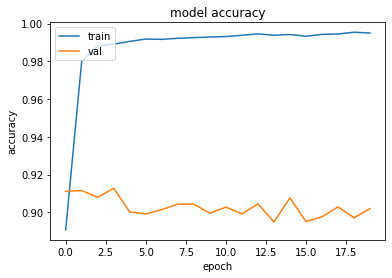

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

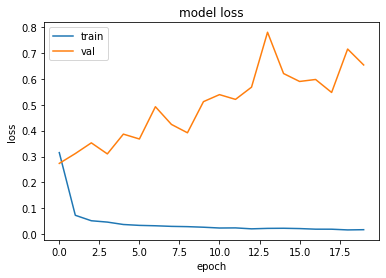

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()